# Bird Migration

In this module, we utilize GPS data from the LifeWatch INBO project to track bird migration patterns.

In [8]:
import numpy as np
import pandas as pd
birddata = pd.read_csv("bird_tracking.csv")
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


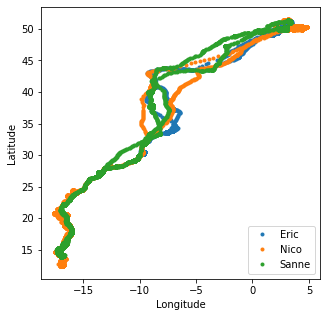

In [7]:
# Examining trajectories
import matplotlib.pyplot as plt
bird_names = pd.unique(birddata.bird_name)
plt.figure(figsize = (5,5))
for name in bird_names:
    idx = birddata.bird_name == name
    x, y = birddata.longitude[idx], birddata.latitude[idx]
    plt.plot(x, y, ".", label = name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

In [9]:
# Examining speed data
np.sum(np.isnan(birddata.speed_2d))

443

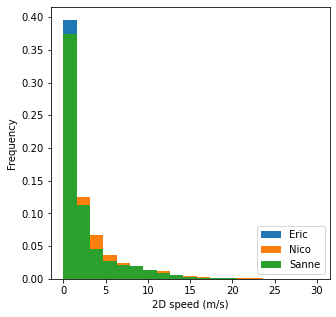

In [22]:
ind = ~np.isnan(birddata.speed_2d)
plt.figure(figsize = (5,5))
for name in bird_names:
    idx = birddata.bird_name == name
    idx_net = [a and b for a,b in zip(list(idx), list(ind))]
    plt.hist(birddata.speed_2d[idx_net], bins = np.linspace(0, 30, 20), density = True, label = name)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")
plt.legend(loc="lower right")

Text(0.5, 0, '2D speed')

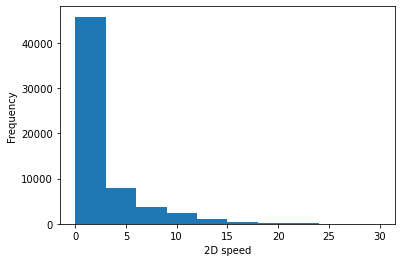

In [23]:
# Using pandas plotting (automatically ignores NaNs)
birddata.speed_2d.plot(kind = 'hist', range=[0,30])
plt.xlabel("2D speed")

In [33]:
# Datetime calculations
import datetime
times = birddata.date_time
times = [datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S") for date_str in times]
times[:5]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42)]

In [35]:
birddata["timestamp"] = pd.Series(times, index = birddata.index)
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [57]:
timesEric = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - timesEric[0] for time in timesEric]
elapsed_time[:10]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34'),
 Timedelta('0 days 02:29:30'),
 Timedelta('0 days 02:44:25'),
 Timedelta('0 days 02:59:19'),
 Timedelta('0 days 03:14:27'),
 Timedelta('0 days 03:29:40')]

In [41]:
elapsed_time[10] / datetime.timedelta(hours = 1)

3.758611111111111

Text(0, 0.5, 'Elapsed Time (Days)')

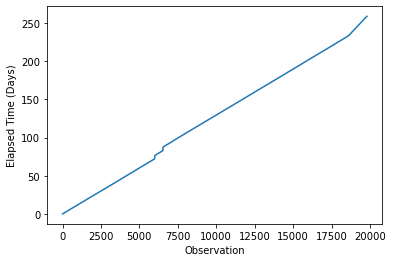

In [43]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days = 1))
plt.xlabel("Observation")
plt.ylabel("Elapsed Time (Days)")

Text(0, 0.5, 'Mean Speed (m/s)')

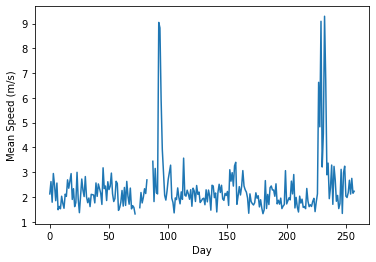

In [47]:
# Mean daily speed
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days = 1)
next_day = 1
inds = []
dms = []
for i,d in enumerate(elapsed_days):
    if d < next_day:
        inds.append(i)
    else:
        dms.append(np.mean(birddata.speed_2d[inds]))
        next_day += 1
        inds = []
plt.plot(dms)
plt.xlabel("Day")
plt.ylabel("Mean Speed (m/s)")

In [61]:
timesSanne = birddata.timestamp[birddata.bird_name == "Sanne"]
elapsed_time_Sanne = [time - timesSanne.iloc[0] for time in timesSanne]
elapsed_time_Sanne[:10]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:52'),
 Timedelta('0 days 01:00:11'),
 Timedelta('0 days 01:30:30'),
 Timedelta('0 days 02:00:16'),
 Timedelta('0 days 02:30:10'),
 Timedelta('0 days 02:59:46'),
 Timedelta('0 days 03:14:49'),
 Timedelta('0 days 03:30:05'),
 Timedelta('0 days 03:45:20')]

C:\Users\Andrew\.julia\conda\3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\Andrew\.julia\conda\3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\Andrew\.julia\conda\3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\Andrew\.julia\conda\3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


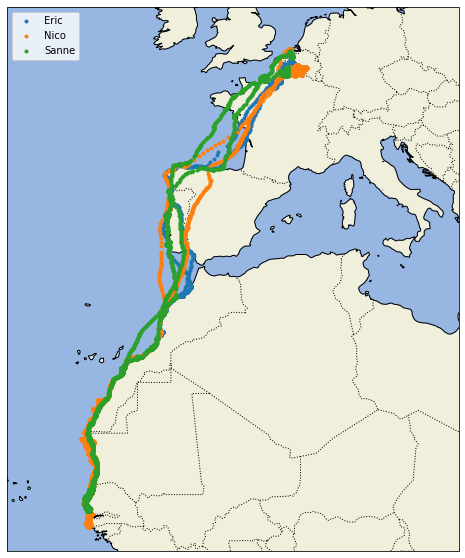

In [67]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y, '.', transform = ccrs.Geodetic(), label=name)
plt.legend(loc = "upper left")